# FAKE ACCOUNT DETECTION IN SOCIAL MEDIA


#####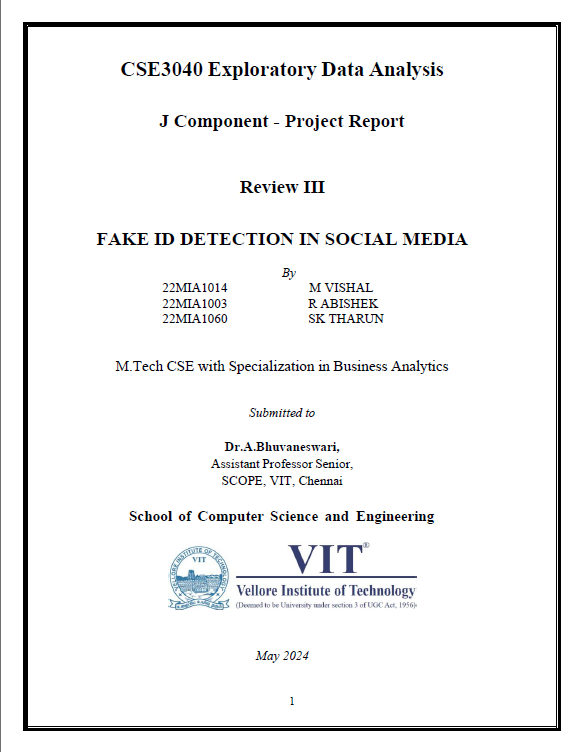

## Installing models and libraries and importing

In [ ]:
pip install shap

In [ ]:
pip install catboost

### **File Upload**

In [ ]:
# Importing libraries
import pandas as pd, numpy as np, plotly.express as px# manipulation and numerical operations
import plotly.graph_objects as go  # DataViz
from plotly.subplots import make_subplots # DataViz
import matplotlib.pyplot as plt # DataViz
import seaborn as sns # DataViz
from sklearn.pipeline import Pipeline # Pipeline for chaining multiple data preprocessing steps
from sklearn.preprocessing import StandardScaler # Data rescaling
from sklearn.model_selection import train_test_split # Data splitting
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score # Evaluation Metrics
from sklearn.preprocessing import FunctionTransformer
import shap
from scipy.stats import kurtosis


# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from plotly.offline import init_notebook_mode
from google.colab import files
import io
init_notebook_mode(connected=True)
train = files.upload()

Saving train.csv to train (3).csv


In [ ]:
test = files.upload()

Saving test.csv to test (3).csv


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
train = pd.read_csv('train.csv') # Training dataset
test = pd.read_csv('test.csv') # Testing dataset

## Preprocessing

In [ ]:
train.isnull().sum()

profile pic              0
nums/length username     0
fullname words           0
nums/length fullname     0
name==username           0
description length       0
external URL             0
private                  0
#posts                  10
#followers               0
#follows                 0
fake                     0
dtype: int64

In [ ]:
column_means = train.mean()
column_means

profile pic                 0.701389
nums/length username        0.163837
fullname words              1.460069
nums/length fullname        0.036094
name==username              0.034722
description length         22.623264
external URL                0.116319
private                     0.381944
#posts                    101.853357
#followers              85307.236111
#follows                  508.381944
fake                        0.500000
dtype: float64

In [ ]:
df_filled = train.fillna(column_means)

In [ ]:
print(df_filled)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length

In [ ]:
def inspect(df):
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Duplicated Values: ')
    print(df.duplicated().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    print('\n')
    print(f'Rows: {df.shape[0]}')
    print(f'Attributes: {df.shape[1]}')
    print('\n')
    print('Head: ')
    print('\n')
    return df.head()

In [ ]:
inspect(df_filled)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                  float64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 576
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32.0,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286.0,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13.0,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679.0,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6.0,151,126,0


In [ ]:
test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  8
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
column_means = test.mean()
column_means

profile pic                 0.758333
nums/length username        0.179917
fullname words              1.550000
nums/length fullname        0.071333
name==username              0.041667
description length         27.200000
external URL                0.100000
private                     0.308333
#posts                     65.696429
#followers              49594.716667
#follows                  779.266667
fake                        0.500000
dtype: float64

In [ ]:
df_fill = test.fillna(column_means)

In [ ]:
df_fill

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35.0,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3.0,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319.0,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273.0,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6.0,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13.0,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4.0,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3.0,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1.0,219,1695,1


In [ ]:
inspect(df_fill)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                  float64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 120
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35.0,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3.0,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319.0,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273.0,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6.0,225,356,0


In [ ]:
train_duplicated = train[train.duplicated(keep=False)]
train_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222.0,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222.0,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0.0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0.0,75,26,1


In [ ]:
test_duplicated = test[test.duplicated(keep=False)]
test_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
61,1,0.27,1,0.0,0,0,0,0,0.0,45,64,1
63,0,0.00,1,0.0,1,0,0,0,0.0,69,694,1
67,0,0.00,1,0.0,1,0,0,0,0.0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0.0,45,64,1


In [ ]:
# Removing duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

# Printing new rows count
print('\n')
print(f'Train new rows count: {train.shape[0]}')
print(f'Test new rows count: {test.shape[0]}')



Train new rows count: 574
Test new rows count: 118


## **Clustering**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

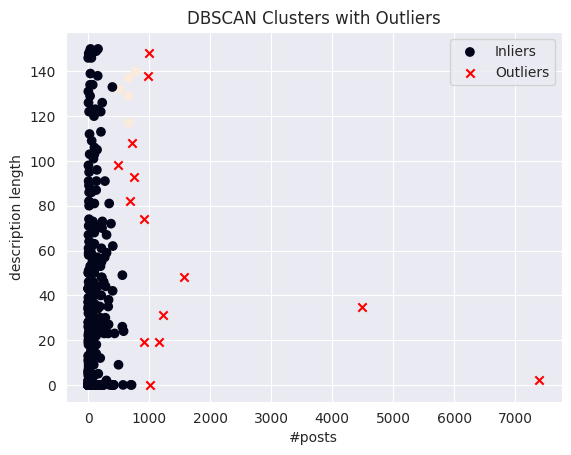

In [ ]:
# Calculate the mean of each column
post_mean = df_filled['#posts'].mean()
dl_mean = df_filled['description length'].mean()

# Fill NaN values with the mean of each column
df_filled['#posts'].fillna(post_mean, inplace=True)
df_filled['description length'].fillna(dl_mean, inplace=True)

# Extract the imputed values into X
X = df_filled[['#posts','description length', ]].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.5  # Adjust as needed
min_samples = 5  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Extract outliers
labels = dbscan.labels_
outliers_mask = labels == -1
outliers = X[outliers_mask]

# Filter outliers from the dataset
cleaned_X = X[~outliers_mask]

# Plot the clusters with outliers
plt.scatter(cleaned_X[:, 0], cleaned_X[:, 1], c=labels[~outliers_mask], label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.xlabel('#posts')
plt.ylabel('description length')
plt.title('DBSCAN Clusters with Outliers')
plt.legend()


plt.show()

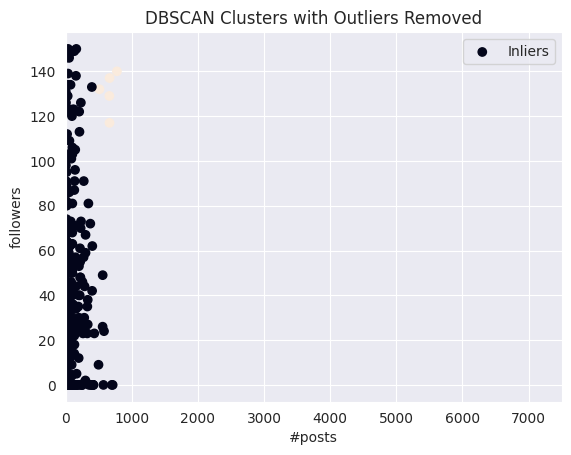

In [ ]:
# Filter outliers from the dataset
cleaned_X = X[~outliers_mask]

# Plot the clusters with outliers removed
plt.scatter(cleaned_X[:, 0], cleaned_X[:, 1], c=labels[~outliers_mask], label='Inliers')
plt.xlabel('#posts')
plt.ylabel('followers')
plt.title('DBSCAN Clusters with Outliers Removed')
plt.legend()
# Set x-axis and y-axis scale
plt.xlim(0, 7500)


plt.show()

In [ ]:
# Defining a function to categorize features
def categorize_features(df):
    # creating empty lists
    continuous_features = []
    binary_features = []

    for col in df.columns:
        if df[col].nunique() <= 2: # if the number of unique values per feature is either equal or smaller than 2, it gets appended to the binary_features list
            binary_features.append(col)
        else:
            continuous_features.append(col) # In case it has more unique values than 2, it get appended to the continuous_feature list
    return continuous_features, binary_features

In [ ]:
# Creating lists with the function
continuous_features, binary_features = categorize_features(train)
# Printing feature categorizations
print('\n')
print('Continuous features:')
print(continuous_features)
print('\n')
print('Binary features:')
print(binary_features)



Continuous features:
['nums/length username', 'fullname words', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']


Binary features:
['profile pic', 'name==username', 'external URL', 'private', 'fake']


## Visualization

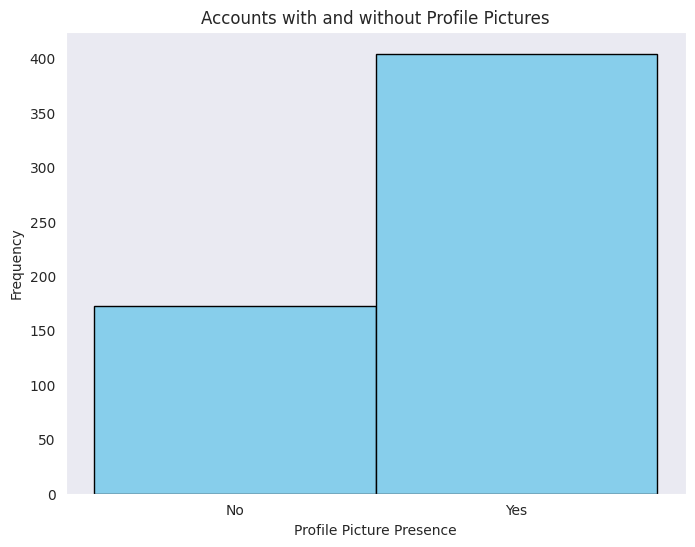

In [ ]:
profile_pic_presence = df_filled['profile pic']

# Count the number of profiles with and without profile pictures
with_profile_pic = profile_pic_presence.sum()
without_profile_pic = len(profile_pic_presence) - with_profile_pic

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(profile_pic_presence, bins=2, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Accounts with and without Profile Pictures')
plt.xlabel('Profile Picture Presence')
plt.ylabel('Frequency')

# Customize x-axis tick labels
plt.xticks([0.25, 0.75], ['No', 'Yes'])

# Remove grid from background
plt.grid(False)

# Show plot
plt.show()

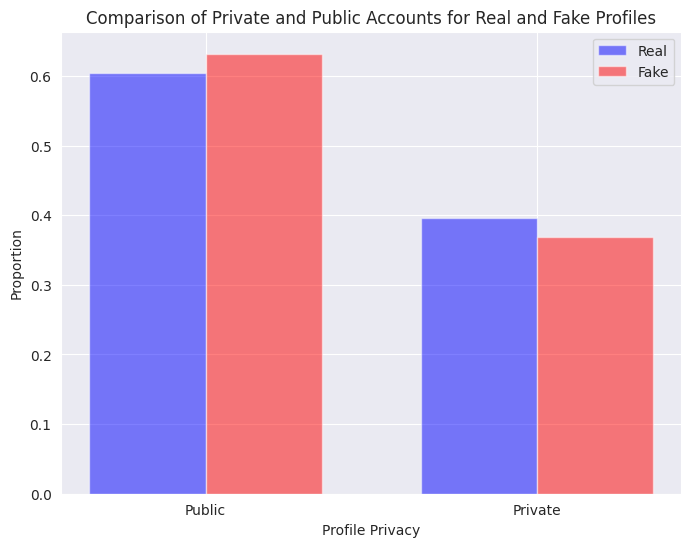

In [ ]:
private_real = df_filled[df_filled['fake'] == 0]['private']
private_fake = df_filled[df_filled['fake'] == 1]['private']

# Count the number of private and public profiles for real and fake profiles
private_counts_real = private_real.value_counts(normalize=True)
private_counts_fake = private_fake.value_counts(normalize=True)

# Create a bar chart
labels = ['Public', 'Private']
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, private_counts_real, width, label='Real', color='blue', alpha=0.5)
plt.bar([i + width for i in x], private_counts_fake, width, label='Fake', color='red', alpha=0.5)

# Add labels and title
plt.title('Comparison of Private and Public Accounts for Real and Fake Profiles')
plt.xlabel('Profile Privacy')
plt.ylabel('Proportion')
plt.xticks([i + width/2 for i in x], labels)

# Add legend
plt.legend()

# Show plot
plt.show()

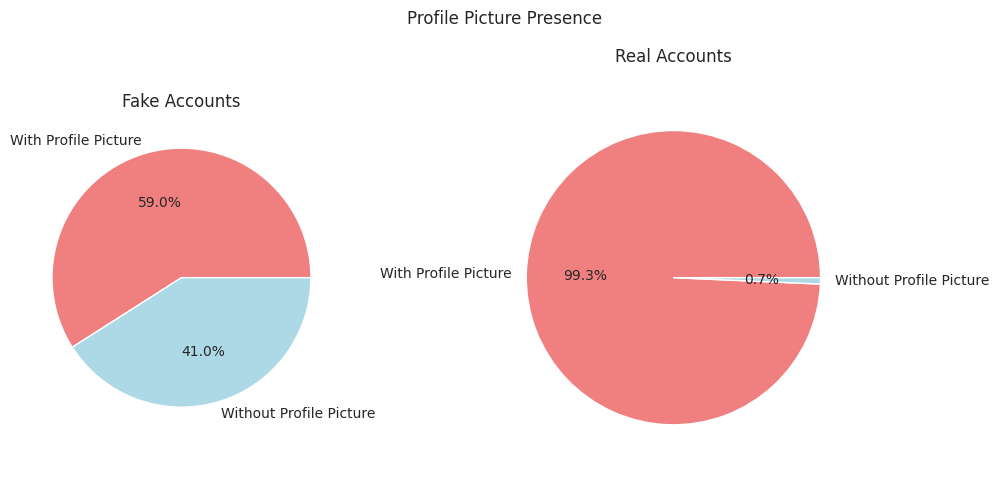

In [ ]:
profile_pic_presence = df_filled['profile pic']
fake = df_filled['fake']

# Count the number of profiles with and without profile pictures for fake and real profiles
fake_profile_pic_counts = profile_pic_presence[fake == 1].value_counts()
real_profile_pic_counts = profile_pic_presence[fake == 0].value_counts()

# Create a figure with equal size
plt.figure(figsize=(10, 5))

# Fake profiles
plt.subplot(1, 2, 1)
plt.pie(fake_profile_pic_counts, labels=['With Profile Picture', 'Without Profile Picture'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Fake Accounts')

# Real profiles
plt.subplot(1, 2, 2)
plt.pie(real_profile_pic_counts, labels=['With Profile Picture', 'Without Profile Picture'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Real Accounts')
plt.suptitle('Profile Picture Presence')
# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [ ]:
corr = df_filled.corr()
corr.style.background_gradient(cmap='RdBu')


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
profile pic,1.000000,-0.364087,0.213295,-0.131756,-0.124903,0.367892,0.236729,0.114732,0.162259,0.061137,0.194833,-0.637315
nums/length username,-0.364087,1.000000,-0.225472,0.408567,0.056890,-0.321170,-0.237125,-0.063713,-0.148382,-0.062785,-0.172413,0.587687
fullname words,0.213295,-0.225472,1.000000,-0.094348,-0.082969,0.272522,0.196562,-0.089070,0.066907,0.033225,0.094855,-0.298793
nums/length fullname,-0.131756,0.408567,-0.094348,1.000000,0.291149,-0.117521,-0.088724,-0.030030,-0.054281,-0.027035,-0.067971,0.246782
name==username,-0.124903,0.056890,-0.082969,0.291149,1.000000,-0.064814,-0.039232,0.046084,-0.047689,-0.017761,-0.009529,0.170695
description length,0.367892,-0.321170,0.272522,-0.117521,-0.064814,1.000000,0.482313,-0.110329,0.134286,0.005929,0.226561,-0.460825
external URL,0.236729,-0.237125,0.196562,-0.088724,-0.039232,0.482313,1.000000,-0.162612,0.145494,0.027189,0.142519,-0.362809
private,0.114732,-0.063713,-0.089070,-0.030030,0.046084,-0.110329,-0.162612,1.000000,-0.077426,-0.073473,-0.057542,-0.028586
#posts,0.162259,-0.148382,0.066907,-0.054281,-0.047689,0.134286,0.145494,-0.077426,1.000000,0.323561,0.092744,-0.233983
#followers,0.061137,-0.062785,0.033225,-0.027035,-0.017761,0.005929,0.027189,-0.073473,0.323561,1.000000,-0.011066,-0.093689


In [ ]:
strong_corr = df_filled.corr().round(6).unstack()
strong_corr = strong_corr[(abs(strong_corr) >= 0.45) & (abs(strong_corr) != 1)]
#strong_corr = strong_corr[abs(strong_corr) >= 0.45]
strong_corr = strong_corr.sort_values(ascending=False)
strong_df= strong_corr.to_frame().reset_index()
strong_df

,level_0,level_1,0
0,nums/length username,fake,0.587687
1,fake,nums/length username,0.587687
2,description length,external URL,0.482313
3,external URL,description length,0.482313
4,description length,fake,-0.460825
5,fake,description length,-0.460825
6,profile pic,fake,-0.637315
7,fake,profile pic,-0.637315


## **SKEWNESS AND KURTOSIS**

In [ ]:
from scipy.stats import skew

In [ ]:
data_column = df_filled['#follows']

skewness = skew(data_column)

print("Skewness of the data:", skewness)

Skewness of the data: 4.7126541820953065


In [ ]:
if skewness < -1:
    skewness_level = "Highly Negatively Skewed"
elif -1 <= skewness < -0.5:
    skewness_level = "Moderately Negatively Skewed"
elif -0.5 <= skewness <= 0.5:
    skewness_level = "Approximately Symmetric"
elif 0.5 < skewness < 1:
    skewness_level = "Moderately Positively Skewed"
else:
    skewness_level = "Highly Positively Skewed"

print("Skewness of the data:", skewness)
print("Skewness Level:", skewness_level)

Skewness of the data: 4.7126541820953065
Skewness Level: Highly Positively Skewed


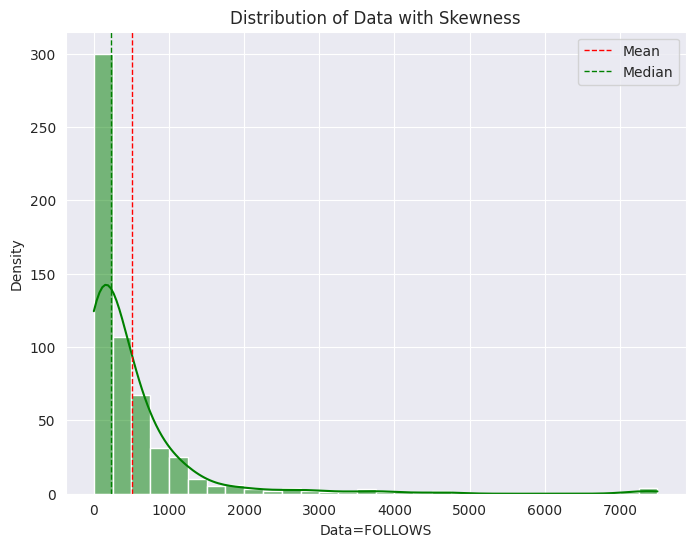

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data file into a DataFrame
df_filled = pd.read_csv("train.csv")

# Assuming your DataFrame has a column named 'data' containing the data you want to analyze
data_column = df_filled['#follows']

# Plot the skewness graph using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data_column, bins=30, color='green', kde=True)
plt.title("Distribution of Data with Skewness")
plt.xlabel("Data=FOLLOWS")
plt.ylabel("Density")
plt.axvline(x=data_column.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=data_column.median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()


In [ ]:
data_column = df_filled['#follows']

# Calculate kurtosis
kurtosis_value = kurtosis(data_column)

print("kurtosis of the data:", kurtosis_value)


kurtosis of the data: 28.17869054703343


In [ ]:
# Determine the type of kurtosis
if kurtosis_value < 0:
    kurtosis_type = "Platykurtic (Negative Kurtosis)"
elif kurtosis_value == 0:
    kurtosis_type = "Mesokurtic (Normal Kurtosis)"
else:
    kurtosis_type = "Leptokurtic (Positive Kurtosis)"

print("Kurtosis value:", kurtosis_value)
print("Kurtosis Type:", kurtosis_type)


Kurtosis value: 28.17869054703343
Kurtosis Type: Leptokurtic (Positive Kurtosis)


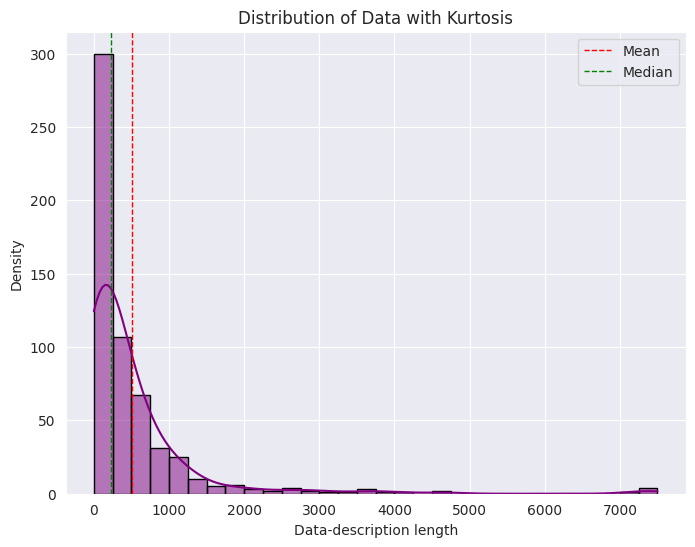

In [ ]:
# Load the data file into a DataFrame
df_filled = pd.read_csv("train.csv")

# Assuming your DataFrame has a column named 'data' containing the data you want to analyze
data_column = df_filled['#follows']

# Plot the kurtosis graph using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data_column, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Distribution of Data with Kurtosis")
plt.xlabel("Data-description length")
plt.ylabel("Density")
plt.axvline(x=data_column.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=data_column.median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()






## **feature extraction**

z score scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv("/content/train.csv")

# Data Cleaning: Drop any rows with missing values
data.dropna(inplace=True)

# Define features and target variable
features = ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname',
            'name==username', 'description length', 'external URL', 'private', '#posts',
            '#followers', '#follows']
X = data[features]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and then transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Print the scaled features
print(X_scaled_df.head())


   profile pic  nums/length username  fullname words  nums/length fullname  \
0     0.660718              0.481058       -1.370411             -0.291477   
1     0.660718             -0.776688        0.519121             -0.291477   
2     0.660718             -0.310856        0.519121             -0.291477   
3     0.660718             -0.776688       -0.425645             -0.291477   
4     0.660718             -0.776688        0.519121             -0.291477   

   name==username  description length  external URL   private    #posts  \
0        -0.19139            0.825096     -0.347552 -0.794433 -0.174366   
1        -0.19139            0.585306     -0.347552 -0.794433  0.459662   
2        -0.19139           -0.587001     -0.347552  1.258759 -0.221794   
3        -0.19139            1.597753     -0.347552 -0.794433  1.440660   
4        -0.19139           -0.587001     -0.347552  1.258759 -0.239267   

   #followers  #follows  
0   -0.092401  0.489512  
1   -0.090504  0.031959  
2 

## **feature selection**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Load the dataset into a pandas DataFrame
data = pd.read_csv("/content/train.csv")

# Data Cleaning: Drop any rows with missing values
data.dropna(inplace=True)

# Define features and target variable
features = ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname',
            'name==username', 'description length', 'external URL', 'private', '#posts',
            '#followers', '#follows']
X = data[features]
y = data['fake']

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=min(4, len(features)))
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)


Selected Features: Index(['profile pic', 'nums/length username', 'description length',
       'external URL'],
      dtype='object')


## **Random Forest**



AUC-ROC Baseline:  0.87
Acurracy Percentage: 87.0 %




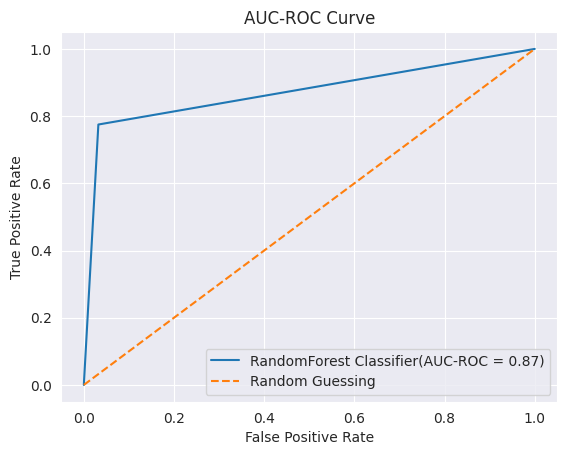

y_val value counts
fake
0    93
1    80
Name: count, dtype: int64


predicted value counts
(array([0, 1]), array([108,  65]))


In [ ]:
# Training, predicting and evaluating baseline

# Splitting dataset into independent variables (X) and target variable (y)

columns_to_drop=['fullname words','nums/length fullname','name==username',	'private'	,'#posts'	,'#followers'	,'#follows','fake']

X = df_filled.drop(columns_to_drop, axis=1)

y = df_filled['fake']

# Creating training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initializing mode
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train) # Fitting to training data

y_pred = rf.predict(X_val) # Predicting on validation set
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})

baseline_score = roc_auc_score(y_val, y_pred)
print('\n')
print('AUC-ROC Baseline: ', baseline_score.round(2))
print('Acurracy Percentage:',baseline_score.round(2)*100,'%')
print('\n')

sns.set_style('darkgrid')
sns.lineplot(x='FPR', y='TPR', data=roc_df, label=f'RandomForest Classifier(AUC-ROC = {baseline_score.round(2)})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('y_val value counts')
print(y_val.value_counts())
print('\n')
print('predicted value counts')
print(np.unique(y_pred, return_counts=True))